import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### EDA

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### how many are null

In [6]:
vals = data.isna().sum().sort_values(ascending=False).values
cols = list(data.isna().sum().sort_values(ascending=False).index)

pd.DataFrame(data=vals, index=cols, columns=['values']).T

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
values,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='quality', ylabel='count'>

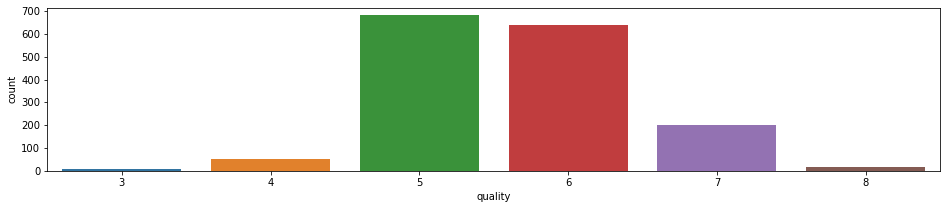

In [7]:
#target
plt.figure(figsize=(16,3))
sns.countplot(data=data, x='quality')

### Distribution of independent variables

In [9]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Data Preprocessiong

In [14]:
#handling NaN
data=data.dropna()

In [16]:
#encoding categorical values
cat_vars = ['quality']
enc_cat_vars = pd.get_dummies(data[cat_vars])

In [18]:
data.drop('quality', axis=1, inplace=True)

In [19]:
data = pd.concat([enc_cat_vars, data], axis=1)
data.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


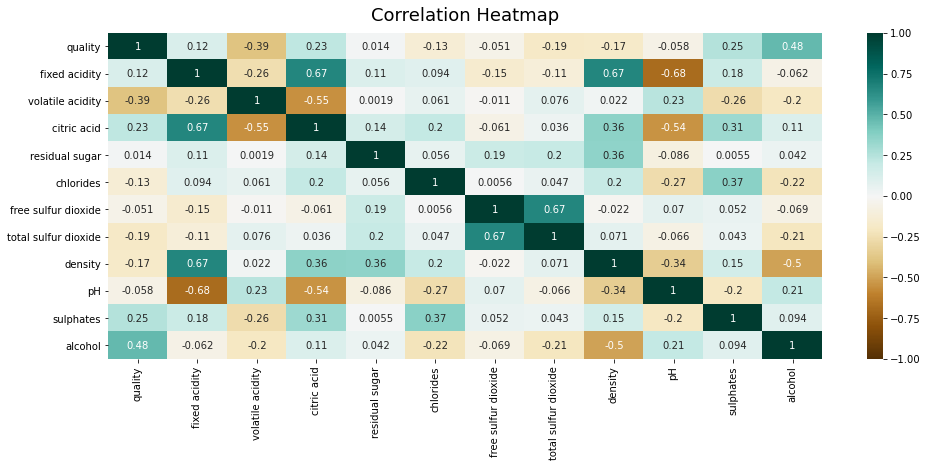

In [20]:
#corelatn matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [21]:
#split the data
X = data.drop('quality', axis=1)
y = data['quality']

In [22]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [23]:
#modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, GridSearchCV, RandomizedSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, classification_report,f1_score, recall_score, precision_score, make_scorer, accuracy_score

In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC


In [28]:
models_dict = {

'RFC_model' : make_pipeline(
                            SelectKBest(f_classif, k=13),
                            RandomForestClassifier(random_state=0, n_jobs=-1)),

'DTC_model' : make_pipeline(
                            SelectKBest(f_classif, k=13),
                            AdaBoostClassifier(DecisionTreeClassifier(),algorithm='SAMME')),

'SVC_model' : make_pipeline(
                            StandardScaler(),
                            SelectKBest(f_classif, k=13),
                            SVC(C=5,kernel='rbf',gamma=5,degree=3,coef0=1)),

'NB_model'  : make_pipeline(
                            SelectKBest(f_classif, k=13), 
                            GaussianNB()),

'DTC_model' : make_pipeline(
                            SelectKBest(f_classif, k=13), 
                            DecisionTreeClassifier()),


    
}

In [32]:
#cross validation
def cross_validation_score(model):
    
    cv = StratifiedKFold(3)
    scores = cross_val_score(model, X_train,y_train, n_jobs=-1, cv=cv, scoring='f1_micro')
    scores = scores.mean()
    return scores

for mod_n, mod in models_dict.items():
    print('{}: Validation score  {}'.format(mod_n, cross_validation_score(mod)))


RFC_model: Validation score  nan
DTC_model: Validation score  nan
SVC_model: Validation score  nan
NB_model: Validation score  nan


In [33]:
#random forest classifies
RFC_model = make_pipeline(SelectKBest(f_classif, k=13),
                          RandomForestClassifier(random_state=0, n_jobs=-1))

In [34]:
def RandomizedSearchCV_(model, param_grid) :
    
    cv = StratifiedKFold(3)
    randomSCV = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='f1_micro', random_state=42)

    randomSCV.fit(X_train, y_train)
    model_best_params = randomSCV.best_estimator_
    
    print('best score :', randomSCV.best_score_ )
    print('best params :', randomSCV.best_params_ )
    
    return model_best_params


In [35]:
RFC_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'randomforestclassifier', 'selectkbest__k', 'selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [36]:
param_grid = {
    
    'selectkbest__k':np.arange(5,14,1),
    'randomforestclassifier__max_depth':np.arange(100,300,50),
    'randomforestclassifier__n_estimators':np.arange(300,500,50)
}

#Tunning Hyperparameters
RFC_model_best_hyp = RandomizedSearchCV_(RFC_model, param_grid)

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = trans

best score : 0.6841636029411765
best params : {'selectkbest__k': 11, 'randomforestclassifier__n_estimators': 400, 'randomforestclassifier__max_depth': 250}


In [37]:
RFC_model_best_hyp.fit(X_train, y_train)

y_pred = RFC_model_best_hyp.predict(X_test)

In [38]:
cm = sns.light_palette("green", as_cmap=True) 
  
ct = pd.crosstab(y_test, y_pred)
ct.style.background_gradient(cmap=cm).set_precision(2)

col_0,5,6,7,8
quality,,,,
3,1,0,0,0
4,9,2,0,0
5,123,19,1,0
6,23,91,9,0
7,3,17,17,0
8,0,2,2,1


In [39]:
#report
print(classification_report(y_test, y_pred,labels=[3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.77      0.86      0.81       143
           6       0.69      0.74      0.72       123
           7       0.59      0.46      0.52        37
           8       1.00      0.20      0.33         5
           9       0.00      0.00      0.00         0

   micro avg       0.72      0.72      0.73       320
   macro avg       0.44      0.32      0.34       320
weighted avg       0.70      0.72      0.70       320



C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
